In [1]:
%load_ext autoreload
%autoreload 2

In [235]:
import neurd

In [4]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

# Data Prep: Loading mesh

In [6]:
segment_id = 123

In [7]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

In [8]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [9]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [10]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [11]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 2700 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_24953.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_24953_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25933010.mls


In [12]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
}



# Step 2: Soma Identification

In [13]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [14]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [15]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [16]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [17]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 6912 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_65990.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_65990_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_592675.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_65990.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_65990_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_592675.mls is being deleted....
There were 16 tot

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.769893]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9599 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_49625.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_49625_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_519951.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_49625.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_49625_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_519951.mls is being deleted....
Inside sphere validater: ratio_val = 2.7266923461590085
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(1070

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.781901, 0.3351845]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9147 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_214150.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_214150_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_116730.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_214150.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_214150_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_116730.mls is being deleted....
Inside sphere validater: ratio_val = 2.130721459144365
Using Poisson Surface Reconstruction for watertightness in soma

xvfb-run -n 407 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_40987.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_40987_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_655985.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Opening a file with extention off
FilterScript
Reading filter with name Remove Duplicate Vertices
Reading filter with name Remove Faces from

removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_511020.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_511020_poisson.off
mesh.is_watertight = False
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_976156.mls is being deleted....
Inside sphere validater: ratio_val = 2.779561458917224
About to add the following inside nuclei pieces after soma backtrack: [<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <tri

  0%|          | 0/9 [00:00<?, ?it/s]

Largest hole before segmentation = 84198.44608552229, after = 79686.03659527568,

ratio = 0.9464074493053798, difference = -4512.409490246602
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 1053 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_39572.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_39572_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_319312.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_39572.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_39572_fill_holes.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_319312.mls is being deleted....
xvfb-run -n 1844 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applicat

  0%|          | 0/2 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>
 <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Not need to do a second pass because already found a soma


In [18]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 2
# of glia = 0
# of nuclei = 18


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [19]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [20]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Step 2b: Saving off pipeline products

In [27]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage")

Saved object at /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/products_up_to_soma_stage.pkl
File size is 3.411244 MB


# Step 3: Decomposition

In [28]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

picking a random 7 digit segment id: 33246865
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
soma_mesh_list_centers = [array([1488880.76058317,  589300.09373793, 1100652.31345512]), array([1472182.71408549,  577993.08644009, 1112354.27575333])]
Getting Glia and Nuclei Pieces Subtracted Away 0.16089963912963867
 Splitting mesh after soma cancellation 1.6356453895568848
# of split_meshes = 4
 Containing Mesh Indices 0.02781534194946289
containing_mesh_indices = {0: 0, 1: 0}
 non_soma_touching_meshes 1.6

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/33579 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.4533708095550537
connecting at the root
branches_touching_root = [6]
combining close nodes
combine_threshold = 700
length of Graph = 3258
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002908632942517017


  0%|          | 0/3 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Decomposing first pass: 2.2313926219940186
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [636, 7672]
mesh_large_connectivity: 0.0023429393768310547
Finding MAP candidates connected components: 7.367134094238281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07179903984069824
Grouping MP Sublimbs by Graph: 0.03551793098449707
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0009133815765380859
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 753 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.017548799514770508
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.486051082611084
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07647037506103516
sbv[0].reshape(-1,3) = [[1487208.   596715.8 1099876. ]]
closest_sk_pt_coord BEFORE = [1487610.  597275. 1100680.]
current_skeleton.shape = (290, 2, 3)
node_for_stitch = 211: [1487610.  597275. 1100680.]
node_for_stitch AFTER = 211: [1487610.  597275. 1100680.]
possible_node_loc = [  0  47 211 290]
possible_node_loc AFTER = [  0  47 211 290]
curr_shortest_path = [211]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1487610.  597275. 1100680.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1487610.,  597275., 1100

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (270, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 9.821785688400269
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8203 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_83580.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_83580_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_969858.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_83580.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 1.6925010681152344
mesh_correspondence_first_pass: 1.6925323009490967
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (270, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (270, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16357727491574386
 conflict_indices % = 0.02455464612421762


  0%|          | 0/17 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.883660316467285
correspondence_1_to_1: 0.36844706535339355
Total time for MAP sublimb processing 11.88373875617981
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01599264144897461
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.007624626159667969
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.001070261001586914
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1491450.08344721  608267.60149996 1098228.13300974]
MP_branches_with_stitch_point = [0, 1]
MAP_branch

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.18173124484748557
 conflict_indices % = 0.01012366034624897


  0%|          | 0/105 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1476472.93997195  615033.74821465 1108138.04148317]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2003627968337731
 conflict_indices % = 0.0037928759894459104


  0%|          | 0/11 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.18957622179668637
 conflict_indices % = 0.04670718508034302


  0%|          | 0/58 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1488771.89112037  605282.82224157 1100475.99894991]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16718458669981354
 conflict_indices % = 0.008079552517091361


  0%|          | 0/10 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23375935869318612
 conflict_indices % = 0.013763896241397565


  0%|          | 0/30 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 25.268543243408203
Number of matching vertices = 26
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1487610.  597275. 1100680.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [4]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/10 [00:00<?, ?it/s]

66697 66698
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/10 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1484150.   588282.7 1095391. ]
Time for preparing soma vertices and root: 0.0002605915069580078
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20269 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.46584153175354004
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5975
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.010165121237665492


  0%|          | 0/11 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Decomposing first pass: 2.9896228313446045
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.4345855712890625e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.052495479583740234
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1483982.08022895  588135.81137922 1094821.63000965]
current_skeleton.shape = (556, 2, 3)
node_for_stitch = 556: [1483982.08022895  588135.81137922 1094821.63000965]
node_for_stitch AFTER = 556: [1483982.08022895  588135.81137922 1094821.63000965]
possible_node_loc = [  2 556]
possible_node_loc AFTER = [  2 556]
curr_shortest_path = [556]
Current stitch point was a branch or end

  0%|          | 0/25 [00:00<?, ?it/s]

40338 40339
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1476534.   581771.6 1109552. ]
Time for preparing soma vertices and root: 0.00018405914306640625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20030 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3067605495452881
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 2074
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002637462007987742


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.4396405220031738
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2093]
mesh_large_connectivity: 0.0001163482666015625
Finding MAP candidates connected components: 7.05718994140625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.05486297607421875
Grouping MP Sublimbs by Graph: 0.022491931915283203
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.015030145645141602
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2008 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poisson_8

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01571822166442871
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.428932189941406
Checking connected components after removing cycles
Total time for mesh KDTree = 0.025260210037231445
sbv[0].reshape(-1,3) = [[1476534.   581771.6 1109552. ]]
closest_sk_pt_coord BEFORE = [1476780.  582505. 1109340.]
current_skeleton.shape = (69, 2, 3)
node_for_stitch = 0: [1476780.  582505. 1109340.]
node_for_stitch AFTER = 0: [1476780.  582505. 1109340.]
possible_node_loc = [ 0 69]
possible_node_loc AFTER = [ 0 69]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1476780.  582505. 1109340.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1476780.,  582505., 1109340.]])}
    Total time for

0it [00:00, ?it/s]

Total time for decomposition = 0.9679651260375977
mesh_correspondence_first_pass: 0.9679880142211914
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (69, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (69, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14763497372193024
 conflict_indices % = 0.0


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.746443271636963
correspondence_1_to_1: 0.14072275161743164
Total time for MAP sublimb processing 8.746516942977905
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.018105745315551758
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1481900.72163354  586937.6302398  1100472.34094648]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20318504935821757
 conflict_indices % = 0.009670694029288388


  0%|          | 0/129 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 16.769046306610107
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1476780.  582505. 1109340.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

39810 39811
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1474851.   571357.5 1113536. ]
Time for preparing soma vertices and root: 0.0002219676971435547
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 12.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.25199389457702637
connecting at the root
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 1216
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026850443032310034


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 0.6959841251373291
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.076957702636719e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.13678288459777832
sbv[0].reshape(-1,3) = [[1474851.   571357.5 1113536. ]]
closest_sk_pt_coord BEFORE = [1478327.0746533   571496.39513115 1112568.79431172]
current_skeleton.shape = (816, 2, 3)
node_for_stitch = 79: [1478327.0746533   571496.39513115 1112568.79431172]
node_for_stitch AFTER = 79: [1478327.0746533   571496.39513115 1112568.79431172]
possible_node_loc = [  0 816]
possible_node_loc AFTER = [  0 816]
curr_shortest_path = [79, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20500180353492847
 conflict_indices % = 0.0


  0%|          | 0/50 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 87.54854055123917
curr_width_median = 443.7225406969436
curr_width_median = 382.2549750344962
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.7583062648773193
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.7509284019470215
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1475123.88888889  571587.50555556 1113243.55555556]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

22345 22346
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1493560.   586779.1 1105606. ]
Time for preparing soma vertices and root: 0.00025200843811035156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 16.50it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23043513298034668
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 741
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.9029879570007324
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20742]
mesh_large_connectivity: 0.00010800361633300781
Finding MAP candidates connected components: 6.389617919921875e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.006676197052001953
Grouping MP Sublimbs by Graph: 2.47955322265625e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.015907764434814453
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9204 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.026201248168945312
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 15.862396717071533
Checking connected components after removing cycles
Total time for mesh KDTree = 0.16779780387878418
sbv[0].reshape(-1,3) = [[1493560.   586779.1 1105606. ]]
closest_sk_pt_coord BEFORE = [1492740.  587136. 1106690.]
current_skeleton.shape = (759, 2, 3)
node_for_stitch = 203: [1492740.  587136. 1106690.]
node_for_stitch AFTER = 203: [1492740.  587136. 1106690.]
possible_node_loc = [  0  49 126 137 149 182 203 315 423 576 588 593 620 716 730 759]
possible_node_loc AFTER = [  0  49 126 137 149 182 203 315 423 576 588 593 620 716 730 759]
curr_shortest_path = [203]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1492740.  587136. 1106690.]
skipping soma 0 because clos

  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (697, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 16.721639394760132
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5283 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_53165.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_53165_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_64716.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_53165.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 3.104112148284912
mesh_correspondence_first_pass: 3.1041369438171387
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (697, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (697, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.17066820943014174
 conflict_indices % = 0.054334201137788064


  0%|          | 0/63 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 21.60326886177063
correspondence_1_to_1: 1.7615511417388916
Total time for MAP sublimb processing 21.603326559066772
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 22.7603178024292
Number of matching vertices = 60
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1474890.  582880. 1113470.]
 [1492740.  587136. 1106690.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [0, 2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

20741 20742
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1486653.   594244.2 1104480. ]
Time for preparing soma vertices and root: 0.0002727508544921875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9843 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20.73it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2342369556427002
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 818
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.5458805561065674
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.8848648071289062e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.52587890625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.14849305152893066
sbv[0].reshape(-1,3) = [[1486653.   594244.2 1104480. ]]
closest_sk_pt_coord BEFORE = [1486547.7606223   594609.92820407 1104601.87572914]
current_skeleton.shape = (817, 2, 3)
node_for_stitch = 817: [1486547.7606223   594609.92820407 1104601.87572914]
node_for_stitch AFTER = 817: [1486547.7606223   594609.92820407 1104601.87572914]
possible_node_loc = [334 817]
possible_node_loc AFTER = [334 817]
curr_shortest_path = [817]
Current stitch point was a branch or endpoint


  0%|          | 0/1 [00:00<?, ?it/s]

19361 19362
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1491272.  582425. 1102199.]
Time for preparing soma vertices and root: 0.0002472400665283203
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7350 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20.59it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1780412197113037
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 734
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.9101231098175049
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.4836273193359375e-05
Total time for MAP sublimb processing 4.0531158447265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2649765014648438e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.121307373046875
sbv[0].reshape(-1,3) = [[1491272.  582425. 1102199.]]
closest_sk_pt_coord BEFORE = [1491378.93502276  582020.70946596 1101822.28585048]
current_skeleton.shape = (733, 2, 3)
node_for_stitch = 1: [1491378.93502276  582020.70946596 1101822.28585048]
node_for_stitch AFTER = 1: [1491378.93502276  582020.70946596 1101822.28585048]
possible_node_loc = [  0 708]
possible_node_loc AFTER = [  0 708]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoi

  0%|          | 0/1 [00:00<?, ?it/s]

14575 14576
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1468936.   574693.8 1112623. ]
Time for preparing soma vertices and root: 0.0003414154052734375
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 39.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11786198616027832
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.1568143367767334
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3349]
mesh_large_connectivity: 0.00012731552124023438
Finding MAP candidates connected components: 4.8160552978515625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.00171661376953125
Grouping MP Sublimbs by Graph: 2.0265579223632812e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0036635398864746094
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2347 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poi

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(785, 3), faces.shape=(1125, 3))>]


  0%|          | 0/1 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/784 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 67.78it/s]

Time for sk_meshparty_obj = 0.036679744720458984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
Time for correspondence = 0.06133079528808594
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02602982521057129
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.704436302185059
Checking connected components after removing cycles
Total time for mesh KDTree = 0.024353981018066406
sbv[0].reshape(-1,3) = [[1468936.   574693.8 1112623. ]]
closest_sk_pt_coord BEFORE = [1466290.  578910. 1113230.]
current_skeleton.shape = (85, 2, 3)
node_for_stitch = 49: [1466290.  578910. 1113230.]
node_for_stitch AFTER = 49: [1466290.  578910. 1113230.]
possible_node_loc = [ 0 49 85]
possible_node_loc AFTER = [ 0 49 85]
curr_shortest_path = [49]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1466290.  578910. 1113230.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1466290.,  578910., 1113230.]])}
    Tota

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (63, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.91999101638794
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7002 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_28302.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_28302_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_742810.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_28302.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_

0it [00:00, ?it/s]

Total time for decomposition = 1.0658552646636963
mesh_correspondence_first_pass: 1.066033124923706
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (63, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (63, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.48253209913406986
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.230329751968384
correspondence_1_to_1: 0.24063420295715332
Total time for MAP sublimb processing 12.230411767959595
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.509755611419678
Number of matching vertices = 90
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1466290.  578910. 1113230.]]
Number of end_nodes BEFORE filtering = 2
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

3348 3349
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 97.78792238235474


 ----- Working on Stitching ----------
Inside attach_floating_pieces_to_limb_correspondence
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.76837158203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 90.32it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02755594253540039
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [400.85083856]
width_median= 400.8508385627582
segment_widths_median = [400.85083856]
Decomposing first pass: 0.04281783103942871
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0994415283203125e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2649765014648438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07182073593139648
Using Distance measure skeletal_distance


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12425398826599121
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.76837158203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 66.06it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03216385841369629
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.01875845]
width_median= 160.01875845053254
segment_widths_median = [160.01875845]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 78.81it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06804561614990234
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.02781829]
width_median= 160.02781829165968
segment_widths_median = [160.02781829]
Using the axon parameters
Decomposing first pass: 0.041367530822753906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7894973754882812e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.14357280731201172
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

139 140
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.23917460441589355
winning_float = 1
winning_float_match_main_limb = 1
winning_float_dist = 149.5869181909169
main_limb_stitch_point = [1454928.38848372  617422.14351492 1109437.08084759]
floating_limb_stitch_point = [1455057.   617365.2 1109488. ]
node_for_stitch = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
node_for_stitch AFTER = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
possible_node_loc = [   0  136  440  586 1094 1284 1353 1466 2499 3964 4341 4358 5744 5814
 5965  577  688 1089 1114 1389 1640 1693 2508 2844 4194 5319]
possible_node_loc AFTER = [   0  136  440  577  586  688 1089 1094 1114 1284 1353 1389 1466 1640
 1693 2499 2508 2844 3964 4194 4358 5319 5744 5814 5965]
curr_shortest_path = [1795, 1784.0, 1773.0, 1761.0, 1750.0, 1733.0, 1716.0, 1702.0, 1687.0, 1678.0, 1671.0, 1664.0, 1656.0, 1649.0, 1641.0, 1636.0, 1632.0, 1627.0, 1623.0, 1596.0, 1576.0, 1566.0, 1556.0, 1548.0, 1540.0, 1530.0, 1523.0, 1515.0, 1507.0, 1499.0, 1491.0, 1484

    current_width= 111.9796517426644
Working on limb L1 branch 3
    current_width= 95.32640663158229
Working on limb L1 branch 7
    current_width= 102.50874533280447
Working on limb L1 branch 8
    current_width= 131.75016231242103
Working on limb L1 branch 5
    current_width= 128.10406228933053
Working on limb L1 branch 6
    current_width= 108.30020672887802
Working on limb L1 branch 0
    current_width= 97.68811695225403
Working on limb L1 branch 2
    current_width= 125.98586935524001
Working on limb L1 branch 23
    current_width= 87.93425564048837
Working on limb L1 branch 24
    current_width= 82.4982383186942
Working on limb L4 branch 2
    current_width= 980.9831322974292
Working on limb L4 branch 0
    current_width= 426.75089109979007
Working on limb L4 branch 3
    current_width= 641.1096029718302
Working on limb L4 branch 1
    current_width= 276.24530855379544
Working on limb L4 branch 4
    current_width= 501.40363236498973
Working on limb L4 branch 5
    current_widt

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 100



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 96



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 84



  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 184



  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 149



  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 153



  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 109



  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 54



  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 85



  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 6
    No spines and using precomputed width: 602.6784666648938
Working on limb L0 branch 3
    current_width= 414.3782496780707
Working on limb L0 branch 7
    No spines and using precomputed width: 373.74842183757386
Working on limb L0 branch 0
    current_width= 261.67118520971894
Working on limb L0 branch 1
    current_width= 277.7069504096059
Working on limb L0 branch 2
    current_width= 297.0009972780132
Working on limb L0 branch 4
    current_width= 301.21669775687826
Working on limb L0 branch 8
    No spines and using precomputed width: 308.0742759524652
Working on limb L0 branch 5
    current_width= 229.5120139403681
Working on limb L0 branch 9
    current_width= 281.0234636151062
Working on limb L1 branch 17
    current_

In [29]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [31]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules(verbose = False)

In [32]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [33]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Saving off neuron

In [93]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"{segment_id}",
    return_file_path = True,
)

Total time for soma meshes compression = 0.14532923698425293
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.29314136505126953
Total time for limb_meshes compression = 0.6717627048492432
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 2.3930892944335938
Total time for compression = 3.9447450637817383


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/123---


# Reloading the Neuron

In [95]:
neuron_obj_rec = nru.decompress_neuron(
    filepath = f"./{segment_id}",
    original_mesh = mesh_decimated,
    #pipeline_products = pipeline_products,
)

Decompressing Neuron in minimal output mode...please wait


In [96]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Step 4A: Multi Soma Split Suggestions

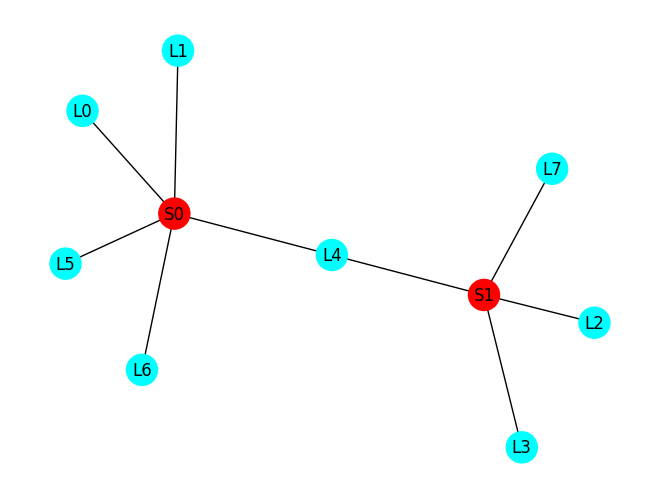

In [115]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [118]:
multi_soma_split_parameters = dict()

In [133]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [136]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


n_paths_multi_soma = 1
n_paths_multi_touch = 0
n_paths_cut = 1


-------- Suggestions for Limb 4------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 4B: Multi Soma Split Execution

In [144]:
neuron_list = ssu.multi_soma_split_execution(
    neuron_obj,
)

In [145]:
nobj_1 = neuron_list[0]
print(nobj_1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Step 5: Cell Typing

In [146]:
n1 = neuron_list[0]
mesh_decimated

In [148]:
nviz.visualize_neuron(
    n1,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [169]:
synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv'

vdi.set_synapse_filepath(
    synapse_filepath
)

In [248]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

from neurd import neuron_pipeline_utils as npu

neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    segment_id = 864691135510518224,
    mesh_decimated = mesh_decimated,
    plot_axon = True,
)


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segmen

100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5028512477874756
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 7906
After combining close endpoints max(kept_branches_idx) = 85, len(kept_branches_idx) = 75
empty_indices % = 0.0
 conflict_indices % = 0.028463139120095123
AFTER face_lookup_resolved_test
Decomposing first pass: 5.923474550247192
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.2874603271484375e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.33514404296875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.020953893661499023
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1484209.07018222  588125.

100%|██████████| 1/1 [00:00<00:00, 332.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.016187429428100586
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Decomposing first pass: 0.017120361328125
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.67572021484375e-06
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.3113021850585938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.03407025337219238
Using Distance measure skeletal_distance
no small end n

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10035848617553711
Floating 1: <trimesh.Trimesh(vertices.shape=(3012, 3), faces.shape=(5404, 3))>
invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 14.24it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12490081787109375
branches_touching_root = [6]
combining close nodes
combine_threshold = 1300
length of Graph = 344
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.0902269743012568
AFTER face_lookup_resolved_test
Decomposing first pass: 0.2885880470275879
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.62939453125e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.3828277587890625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.42392611503601074
Using Distance measure skeletal_dista

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7721388339996338
winning_float = 0
winning_float_match_main_limb = 0
winning_float_dist = 21.0
main_limb_stitch_point = [1465674.  643860. 1076901.]
floating_limb_stitch_point = [1465674.  643881. 1076901.]
node_for_stitch = 3609: [1465674.  643860. 1076901.]
node_for_stitch AFTER = 3609: [1465674.  643860. 1076901.]
possible_node_loc = [   0   56  231  394  489  599  750  886  911  923  930 1520 1868 1916
 1970 1977 2099 2137 2186 2257 2467 2558 2570 2654 2948 3166 3249 3609
 3667 3907 4018 4333 5310 5723 5732 6499 6879 6970 7222 7513 7623 7638
 7758 7797 7841  350  845  860 1042 1233 1518 1531 1665 1739 1782 2196
 2378 2575 2655 2761 2911 3114 3620 3782 3846 3900 4086 4485 5560 6468
 6601 6896 7065 7167 7429 7447]
possible_node_loc AFTER = [   0   56  231  350  394  489  599  750  845  860  886  911  923  930
 1042 1233 1518 1520 1531 1665 1739 1782 1868 1916 1970 1977 2099 2137
 2186 2196 2257 2378 2467 2558 2570 2575 2654 2655 2761 2911 2948 3114
 3166 3249 3609 3620 3

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [256]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

In [260]:
#2) Proofreading Full Run
validation = False
plot_data = False
proofread_verbose= True
plot_head_neck_shaft_synapses = False
plot_limb_branch_filter_with_disconnect_effect = False
plot_compartments = True
plot_valid_synapses = True
plot_error_synapses = True

#4) Neuron Objects
proof_version = 7
compute_G_after_proof = True

#5) Neuron Statistics 
cell_type_used = "neurd"

verbose = True
proofread_verbose = True
return_red_blue_splits = True
return_split_locations = True

In [258]:
cell_type = neuron_obj_axon.cell_type
nucleus_id = neuron_obj_axon.cell_type

'excitatory'


--- a) adding head neck shaft bouton labels (and setting the labels to synapses)

a) Time for head/neck/shaft/bouton labels and syn label: 0.29699039459228516

--- c) Proofreading the Neuron

*****Using v7 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges_old
function arguments = {'use_pre_existing_axon_labels': True}


----------------------- Running Filter ------------------
using pre-existing labels for axon-error detection
limb_branch_dict was empty so returning original neuron
----------------------- FINISHED Running Filter ------------------



 --Filter axon_on_dendrite_merges Results --

--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


----------------------- Running Filter ------------------


 ----- Working on limb L1-------


 ----- Working on branch 0/75: 0--------
Current node skip distance was 1499.246974

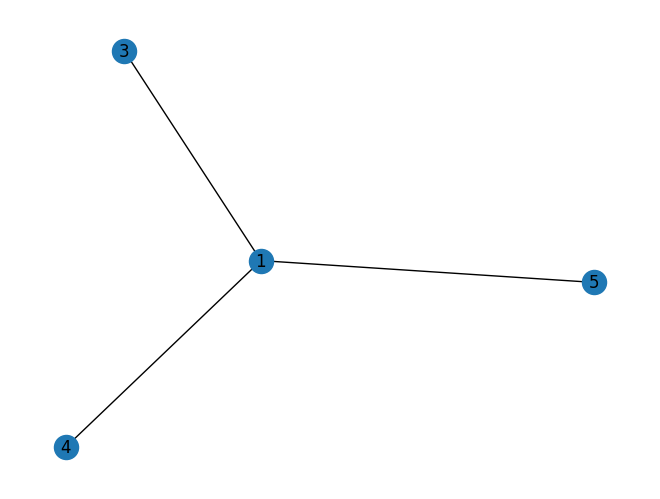

Performing global features query
Done with edge_df: 0.0013718605041503906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976                   0.0   
1  1  4     51.52   29.692440               0.406747                   0.0   
2  1  5     38.18   27.008424               0.270062                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
Afer Global query: 
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976                   0.0   


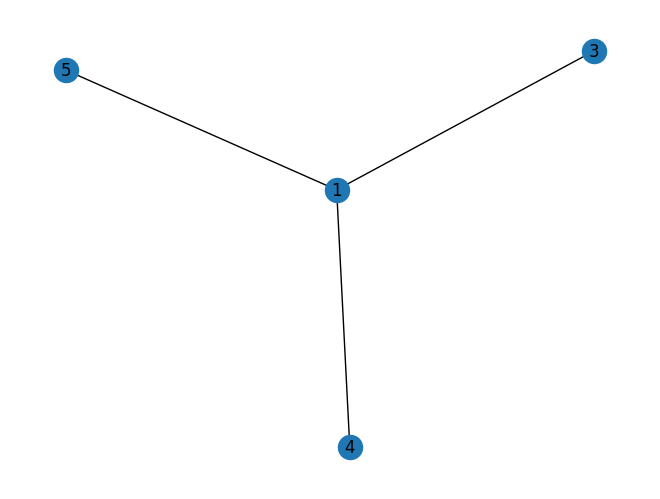

Performing node features query
Done with edge_df: 0.0009298324584960938
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976                   0.0   
1  1  4     51.52   29.692440               0.406747                   0.0   
2  1  5     38.18   27.008424               0.270062                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   True  
2                   None  
Afer Node query: 
   u  v  sk_angle  width_diff  width_diff_percent

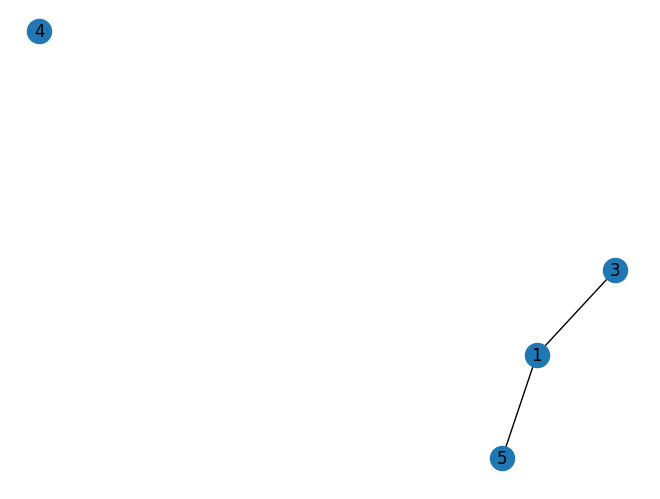

for upstream node 5, winning_node = None, error_branches = [1 3 4]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
winning_downstream = None,error_downstream = [1 3 4] 


 ----- Working on branch 6/75: 6--------
Current node skip distance was 1923.9180300989 but max skip distance was 1923.9180300989
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 7/75: 7--------
Current node skip distance was 1439.6098165500885 but max skip distance was 1439.6098165500885
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 8/75: 8--------
Current node skip distance was 1426.1003522878293 but max skip distance was 1426.1003522878293
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 9/75: 9--------
Current node skip distance was 1395.1715386565604 but max skip distance was 1395.1715386565604
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 10/75: 10--------
Cur

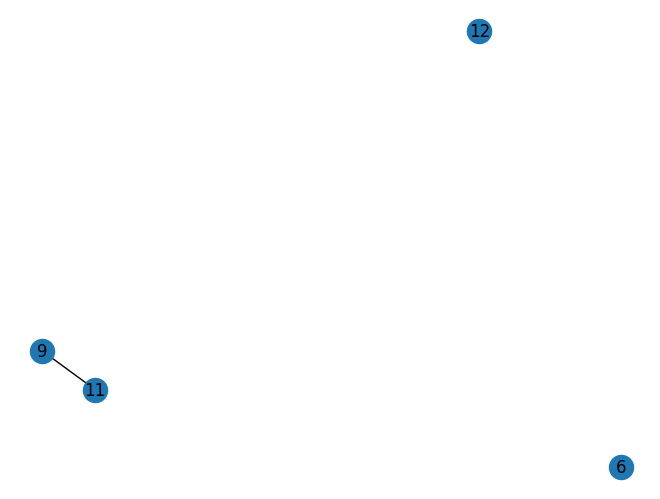

Performing global features query
Done with edge_df: 0.0017571449279785156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  9  11     35.53   15.239797                0.27789                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  9  11     35.53   15.239797                0.27789                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                          None  


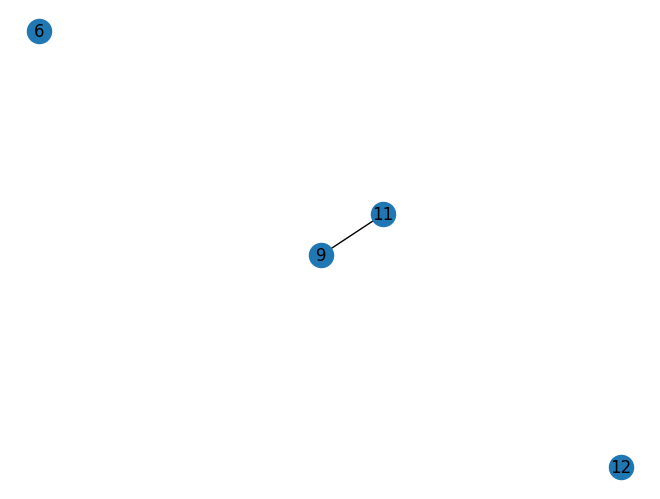

Performing node features query
Done with edge_df: 0.0010271072387695312
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  9  11     35.53   15.239797                0.27789                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  9  11     35.53   15.239797                0.27789                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  


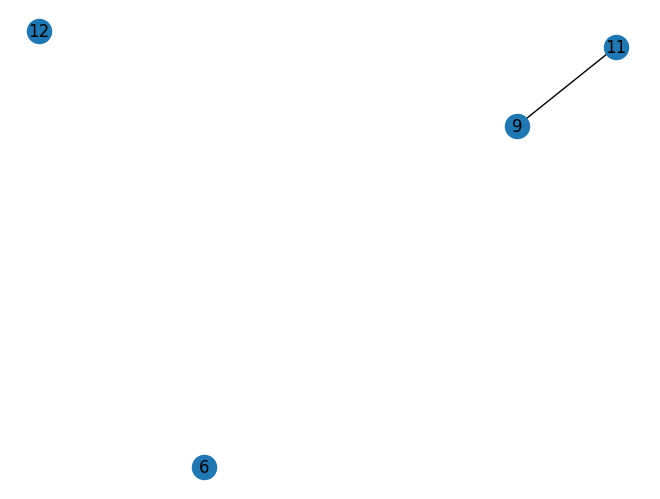

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
winning_downstream = None,error_downstream = [ 6  9 11] 


 ----- Working on branch 13/75: 13--------
Current node skip distance was 1413.1499940870053 but max skip distance was 1413.1499940870053
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 14/75: 14--------
Current node skip distance was 2037.8786323737118 but max skip distance was 2037.8786323737118
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 15/75: 15--------
Current node skip distance was 1396.4701283307018 but max skip distance was 1396.4701283307018
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 16/75: 16--------
Current node skip distance was 1557.7705577183872 but max skip distance was 1656.1581222996276
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 17/75: 17--------
Current node skip distance was 1526.9558030189544 but

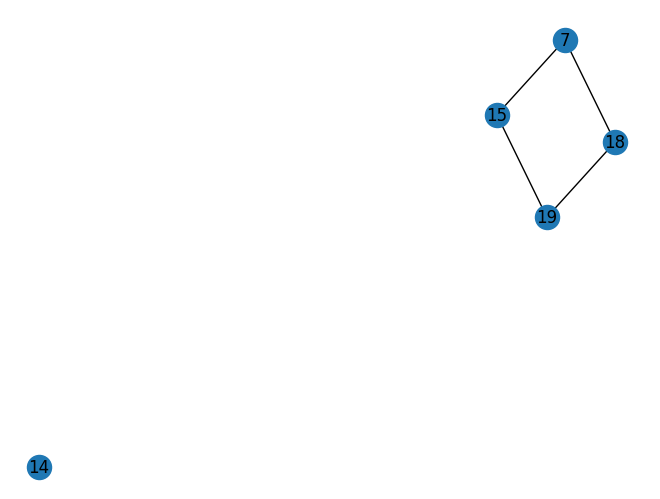

Performing global features query
Done with edge_df: 0.0007758140563964844
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  15     39.51   10.353525               0.158054                   0.0   
1   7  18     12.36   13.486304               0.170729                   0.0   
2  15  19     11.57   21.442249               0.388779                   0.0   
3  19  18     42.64    2.397580               0.030352                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                        True                          None  
1                0                       False                          None  
2                0                       False                          None  
3                0                        True                          None  
Afer 

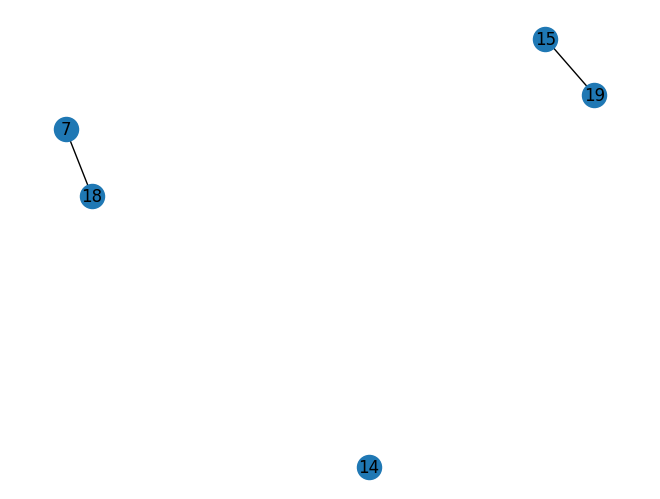

Performing node features query
Done with edge_df: 0.0006780624389648438
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  18     12.36   13.486304               0.170729                   0.0   
1  15  19     11.57   21.442249               0.388779                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   
1                0                       False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  18     12.36   13.486304               0.170729                   0.0   
1  15  19     11.57   21.442249               0.388779          

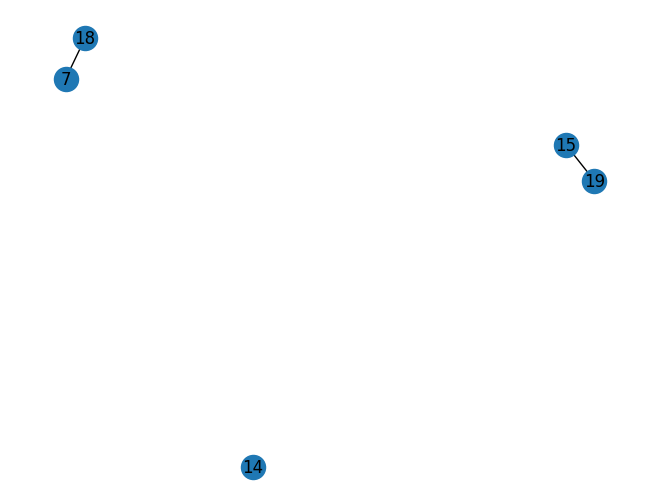

for upstream node 18, winning_node = 7, error_branches = [14 15 19]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
winning_downstream = 7,error_downstream = [14 15 19] 


 ----- Working on branch 19/75: 19--------
Current node skip distance was 1485.8128323759233 but max skip distance was 1485.8128323759233
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 20/75: 20--------
Current node skip distance was 1539.155178470452 but max skip distance was 1611.6505289229938
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009562969207763672
Performing Edge Query
After edge filter, # of rows = 10
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   12  21     52.72   29.595414         

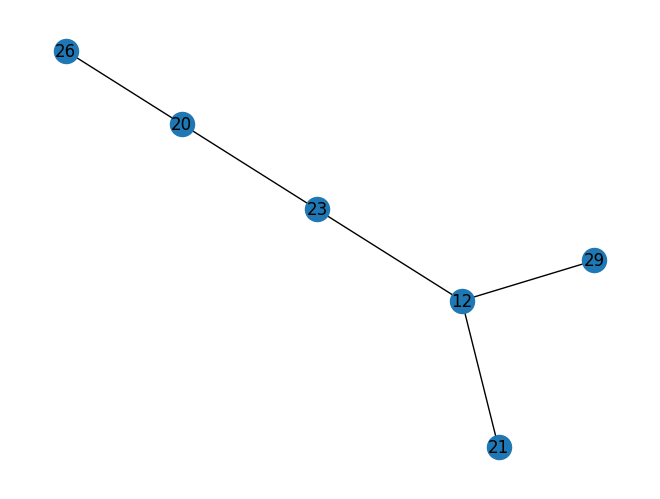

Performing global features query
Done with edge_df: 0.0007841587066650391
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  12  21     52.72   29.595414               0.488392                   0.0   
1  12  23     57.20    1.161105               0.019161                   0.0   
2  12  29     34.74   10.451040               0.172466                   0.0   
3  23  20     53.63   27.638529               0.309165                   0.0   
4  26  20     14.73   17.398884               0.194624                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

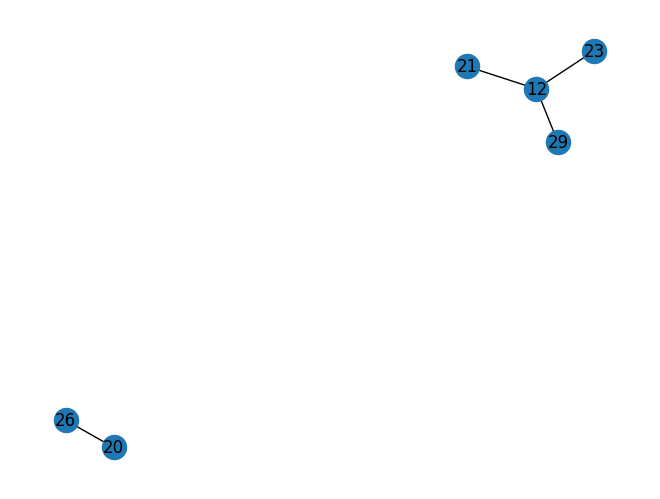

Performing node features query
Done with edge_df: 0.001087188720703125
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  12  21     52.72   29.595414               0.488392                   0.0   
1  12  23     57.20    1.161105               0.019161                   0.0   
2  12  29     34.74   10.451040               0.172466                   0.0   
3  26  20     14.73   17.398884               0.194624                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                      False                          None   

  above_t

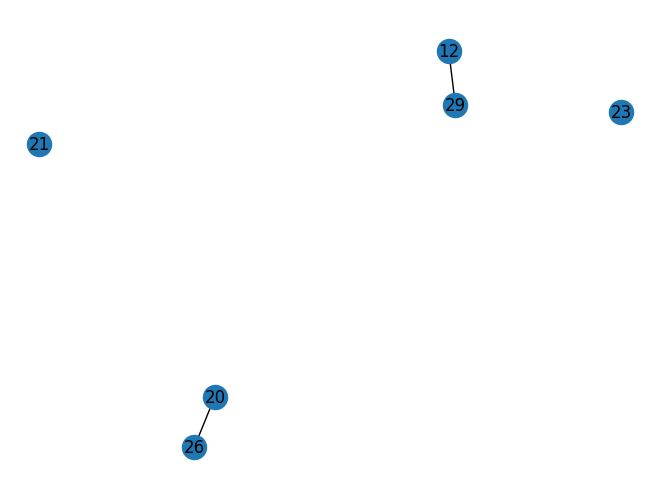

for upstream node 20, winning_node = 26, error_branches = [12 21 23 29]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
winning_downstream = 26,error_downstream = [12 21 23 29] 


 ----- Working on branch 21/75: 21--------
Current node skip distance was 1542.4709318505866 but max skip distance was 1542.4709318505866
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 22/75: 22--------
Current node skip distance was 1489.1567938332191 but max skip distance was 1489.1567938332191
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 23/75: 23--------
Current node skip distance was 1423.9946428663225 but max skip distance was 1423.9946428663225
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 24/75: 24--------
Current node skip distance was 1831.8999091763758 but max skip distance was 1854.1883916217478
winning_downstream = None,error_downstream = [] 


 ----- Wo

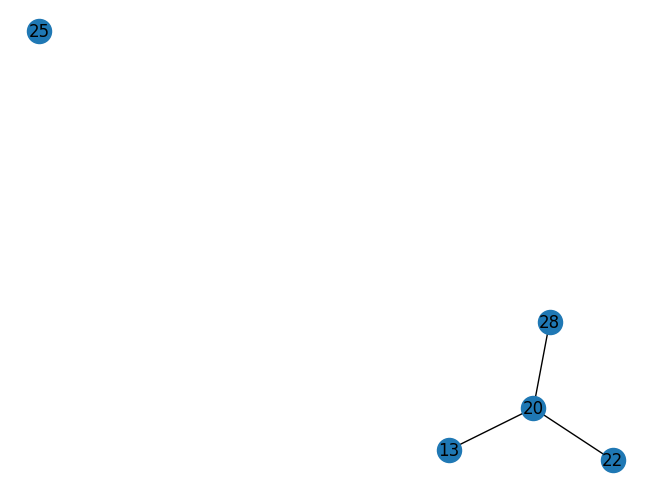

Performing global features query
Done with edge_df: 0.000827789306640625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   30.241244               0.511212                   0.0   
1  20  22     27.54   11.999612               0.134228                   0.0   
2  20  28     13.50   43.180424               0.325699                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   30.241244               0.511212               

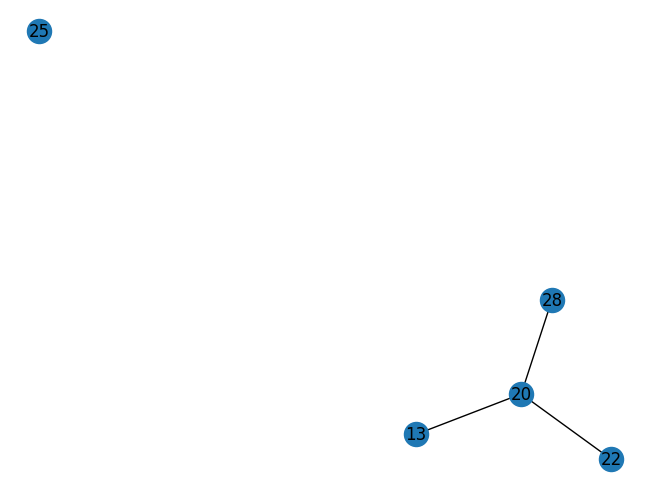

Performing node features query
Done with edge_df: 0.000701904296875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   30.241244               0.511212                   0.0   
1  20  22     27.54   11.999612               0.134228                   0.0   
2  20  28     13.50   43.180424               0.325699                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_p

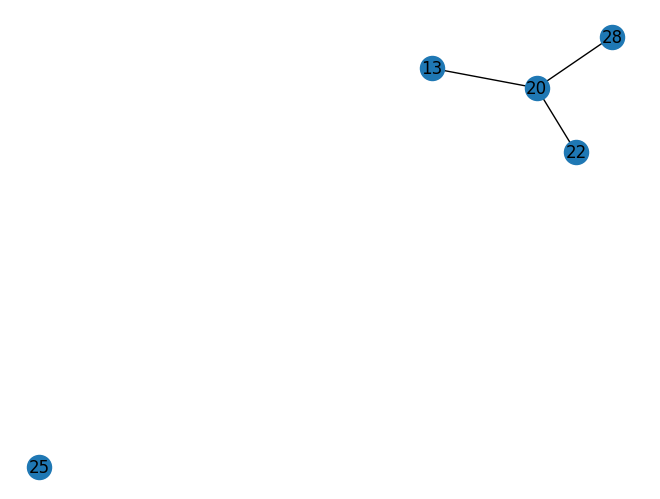

for upstream node 28, winning_node = None, error_branches = [13 20 22 25]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
winning_downstream = None,error_downstream = [13 20 22 25] 


 ----- Working on branch 29/75: 29--------
Current node skip distance was 1462.702705562729 but max skip distance was 1462.702705562729
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 30/75: 30--------
Current node skip distance was 1826.2385344561253 but max skip distance was 1826.2385344561253
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008461475372314453
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.792071               

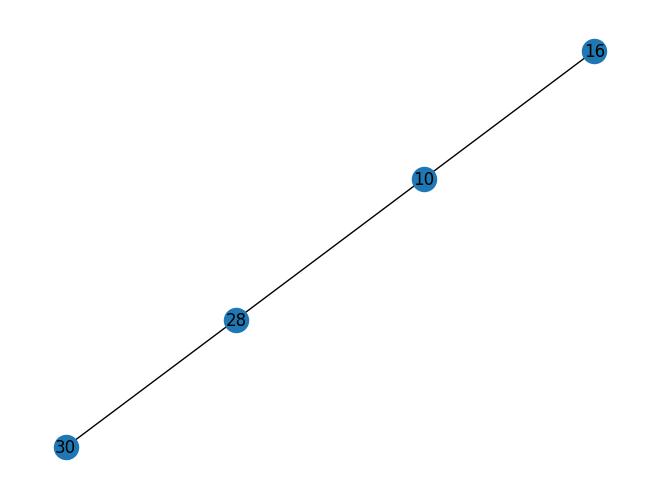

Performing global features query
Done with edge_df: 0.0009531974792480469
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.792071               0.323042                   0.0   
1  10  28     47.78    6.079338               0.043844                   0.0   
2  28  30     43.46   25.719581               0.162476                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                      False                          None  
1                0                       True                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.792071               0.323042              

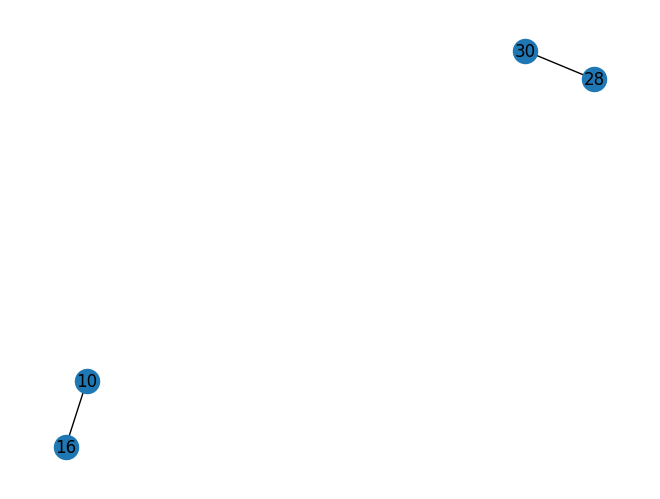

Performing node features query
Done with edge_df: 0.0009286403656005859
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.792071               0.323042                   0.0   
1  28  30     43.46   25.719581               0.162476                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                      False                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.792071               0.323042                   0.0   
1  28  30     43.46   25.719581               0.162476             

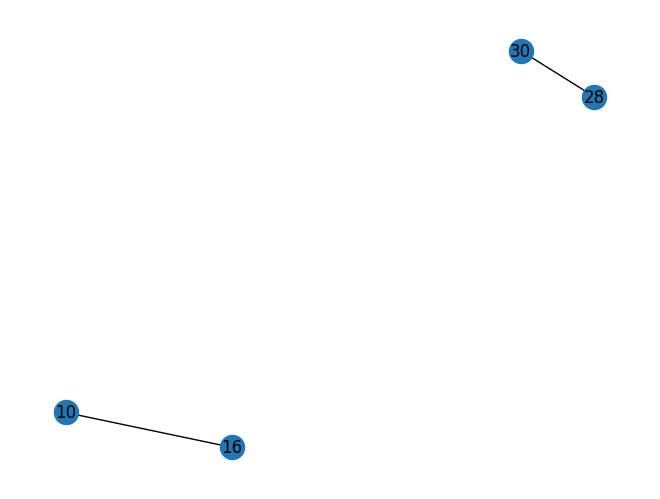

for upstream node 30, winning_node = 28, error_branches = [10 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (132.57766705382286) less than width_min(250)
winning_downstream = 28,error_downstream = [10 16] 


 ----- Working on branch 31/75: 31--------
Current node skip distance was 1502.8179992499754 but max skip distance was 1502.8179992499754
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 32/75: 32--------
Current node skip distance was 1514.7338603948238 but max skip distance was 1524.848963791166
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008475780487060547
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  31  35    114.80    5.287431

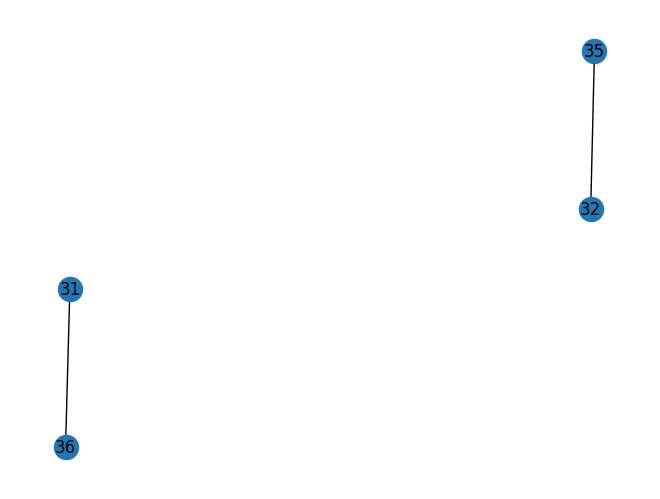

Performing global features query
Done with edge_df: 0.0006861686706542969
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  31  36     27.07    2.906015               0.036021                   0.0   
1  35  32     22.10    2.427625               0.029061                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                          False  
1                0                       False                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  31  36     27.07    2.906015               0.036021                   0.0   
1  35  32     22.10    2.427625               0.029061                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_pa

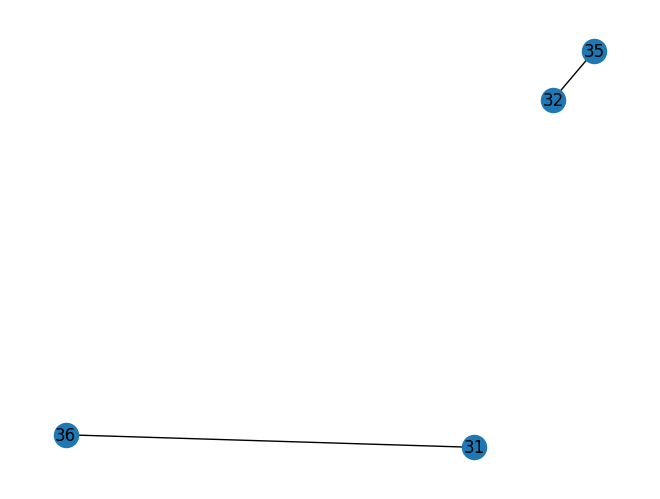

Performing node features query
Done with edge_df: 0.0007717609405517578
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  31  36     27.07    2.906015               0.036021                   0.0   
1  35  32     22.10    2.427625               0.029061                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                          False   
1                0                       False                          False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  31  36     27.07    2.906015               0.036021                   0.0   
1  35  32     22.10    2.427625               0.029061       

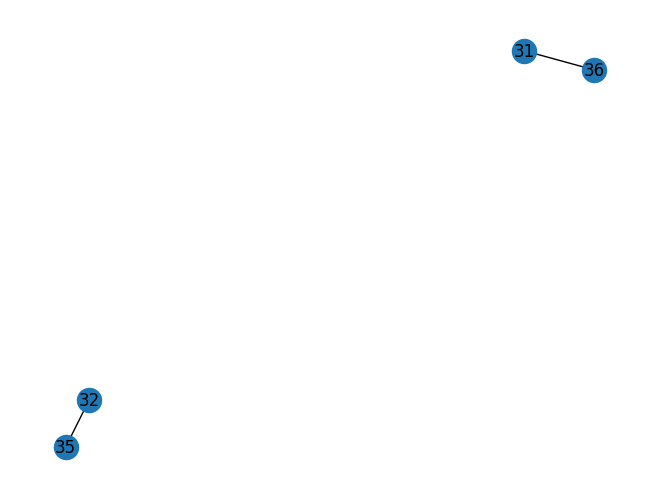

for upstream node 32, winning_node = 35, error_branches = [31 36]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (109.09299279309766) less than width_min(250)
winning_downstream = 35,error_downstream = [31 36] 


 ----- Working on branch 33/75: 33--------
Current node skip distance was 1608.7992850545759 but max skip distance was 1826.2385344561253
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0011506080627441406
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  30     77.08   66.769260               0.729496                   0.0   
1  27  32     25.52    7.991862               0.087316                   0.0   
2  27  33    144.95   14.583840               0.137438     

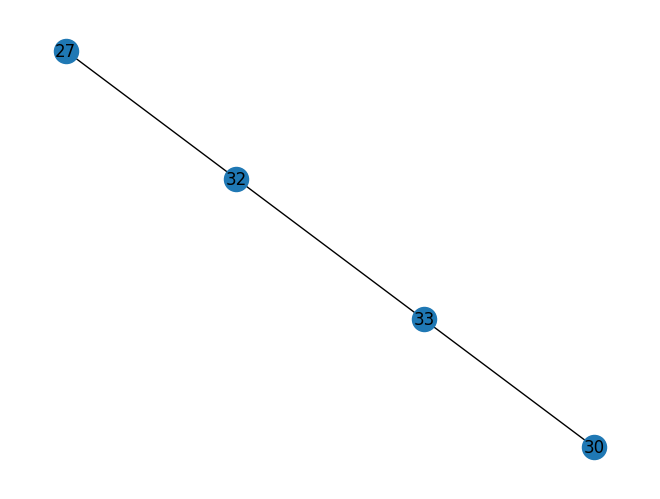

Performing global features query
Done with edge_df: 0.0010869503021240234
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    7.991862               0.087316                   0.0   
1  30  33     47.52   52.185420               0.491796                   0.0   
2  32  33     12.61   22.575702               0.212754                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    7.991862               0.087316              

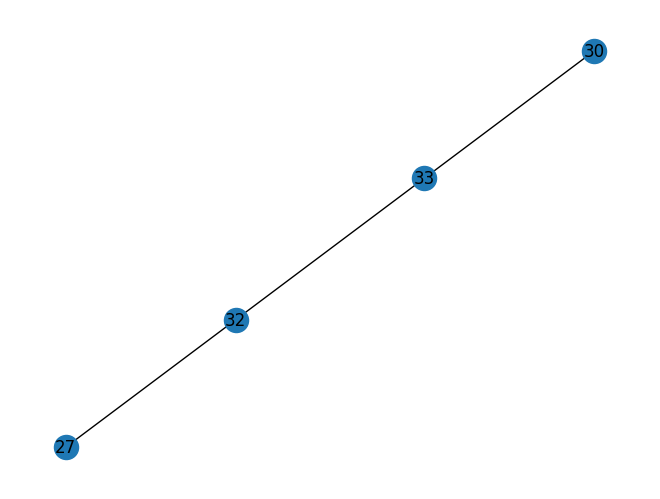

Performing node features query
Done with edge_df: 0.0008461475372314453
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    7.991862               0.087316                   0.0   
1  30  33     47.52   52.185420               0.491796                   0.0   
2  32  33     12.61   22.575702               0.212754                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   True  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

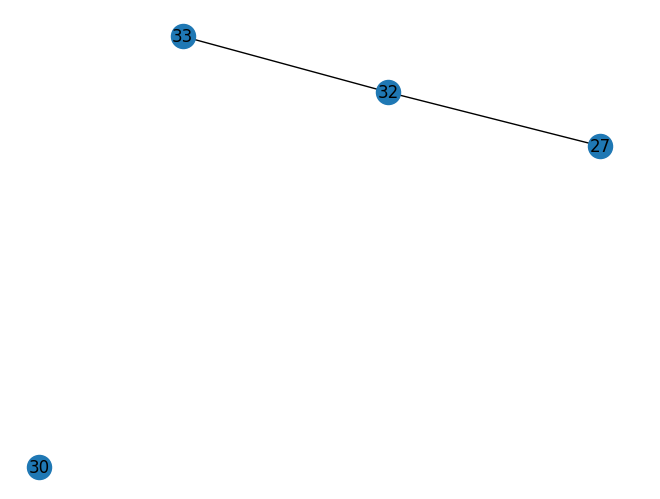

for upstream node 33, winning_node = None, error_branches = [27 30 32]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
winning_downstream = None,error_downstream = [27 30 32] 


 ----- Working on branch 34/75: 34--------
Current node skip distance was 1735.5520872058273 but max skip distance was 1735.5520872058273
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 35/75: 35--------
Current node skip distance was 1524.848963791166 but max skip distance was 1524.848963791166
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 36/75: 36--------
Current node skip distance was 1490.7096028543692 but max skip distance was 1490.7096028543692
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 37/75: 37--------
Current node skip distance was 1660.3424376531739 but max skip distance was 1660.3424376531739
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 38

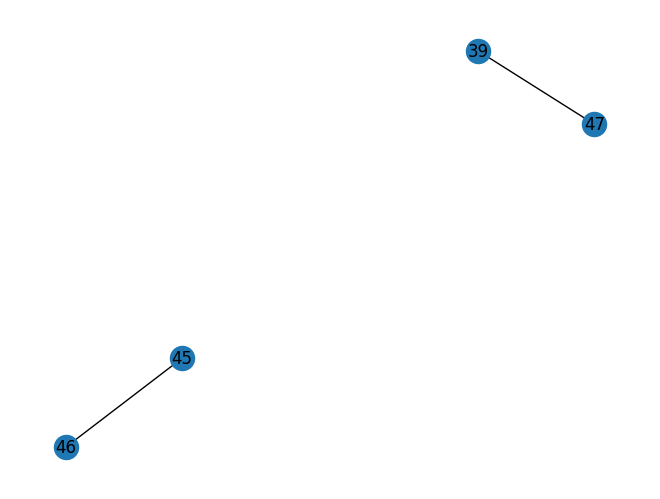

Performing global features query
Done with edge_df: 0.0019447803497314453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    6.450551               0.085974                   0.0   
1  45  46     17.97   23.495907               0.117317                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                          False  
1                0                       False                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    6.450551               0.085974                   0.0   
1  45  46     17.97   23.495907               0.117317                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_pa

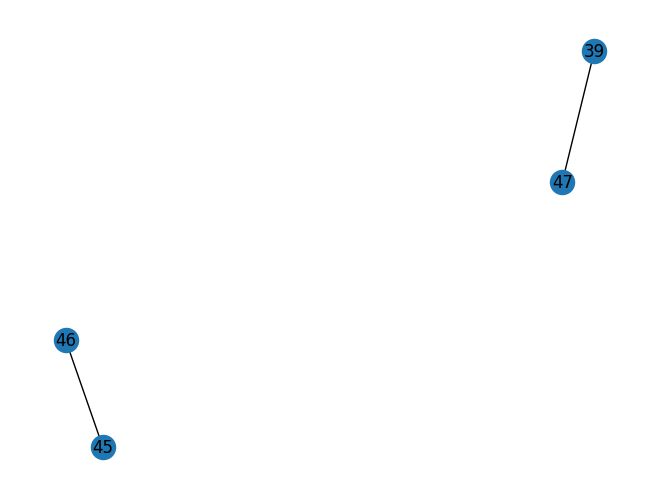

Performing node features query
Done with edge_df: 0.0009238719940185547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    6.450551               0.085974                   0.0   
1  45  46     17.97   23.495907               0.117317                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                          False   
1                0                       False                          False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    6.450551               0.085974                   0.0   
1  45  46     17.97   23.495907               0.117317       

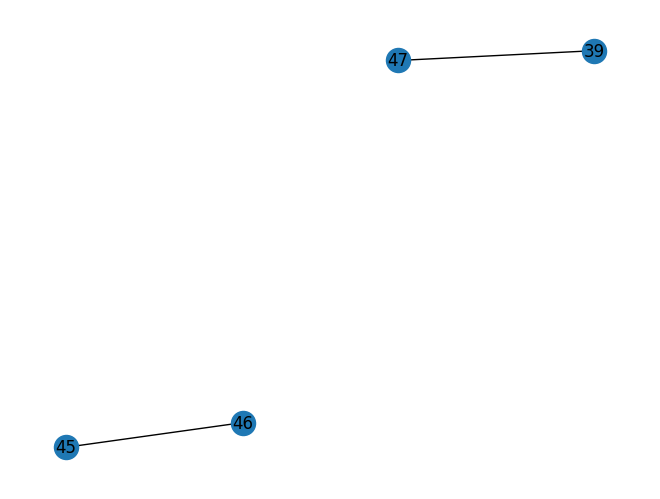

for upstream node 46, winning_node = 45, error_branches = [39 47]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (176.78073002801082) less than width_min(250)
winning_downstream = 45,error_downstream = [39 47] 


 ----- Working on branch 47/75: 47--------
Current node skip distance was 1506.165582874341 but max skip distance was 1506.165582874341
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 48/75: 48--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 49/75: 49--------
Current node skip distance was 1450.4508458210582 but max skip distance was 1450.4508458210582
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 50/75: 50--------
Current node skip distance was 2015.2411101729735 but max skip distance was 2015.2411101729735
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 51/75: 51--------
Current node skip distance was 1874.4952927129884 but max s

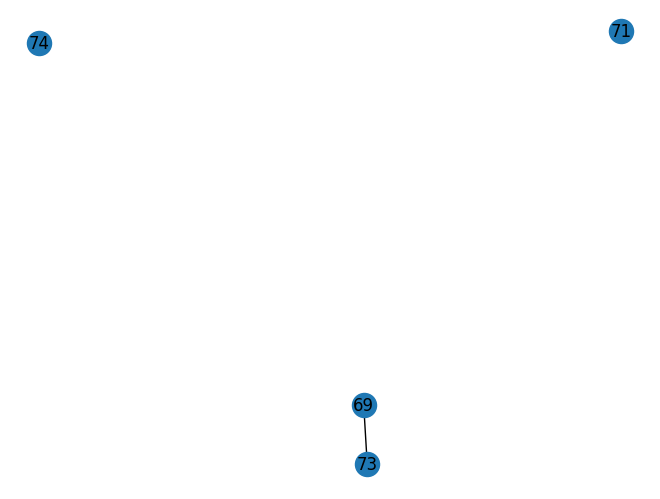

Performing global features query
Done with edge_df: 0.0013682842254638672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  69     29.47     13.0934               0.211248                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  69     29.47     13.0934               0.211248                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                          None  


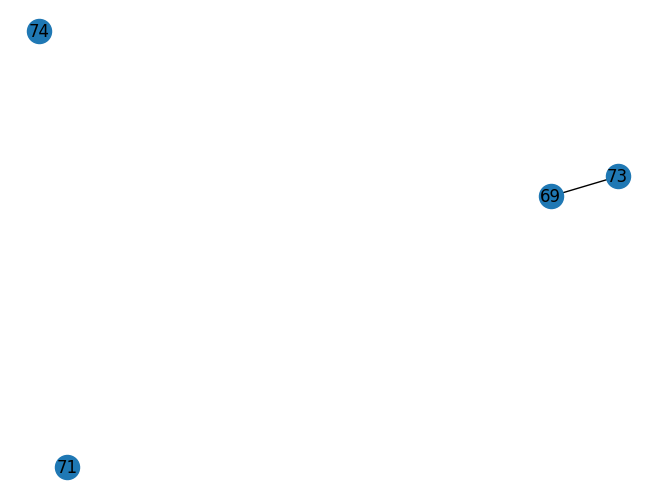

Performing node features query
Done with edge_df: 0.0007936954498291016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  69     29.47     13.0934               0.211248                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  69     29.47     13.0934               0.211248                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  


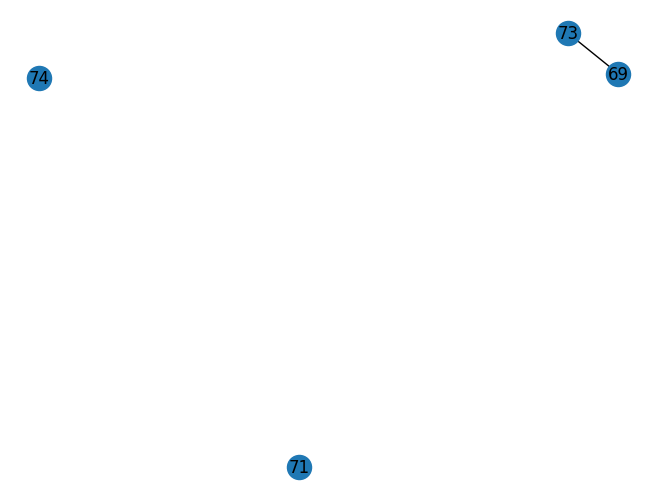

for upstream node 69, winning_node = 73, error_branches = [71 74]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (75.0746500415666) less than width_min(250)
winning_downstream = 73,error_downstream = [71 74] 


 ----- Working on branch 70/75: 70--------
Current node skip distance was 1461.022438039407 but max skip distance was 1461.022438039407
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 71/75: 71--------
Current node skip distance was 1528.0046849802366 but max skip distance was 1528.0046849802366
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 72/75: 72--------
Current node skip distance was 1362.1728053872455 but max skip distance was 1362.1728053872455
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 73/75: 73--------
Current node skip distance was 1479.477708506527 but max skip distance was 1479.477708506527
winning_downstream = None,error_downstream = [] 


 ----- Work

AttributeError: 'Graph' object has no attribute 'pred'

In [269]:
from neurd import proofreading_utils as pru

from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_proof,filtering_info = pru.proofread_neuron_full(
    neuron_obj_axon,
    #original_mesh = mesh_decimated,

    # arguments for processing down in DecompositionCellTypeV7
    cell_type=cell_type,
    add_back_soma_synapses = False,

    proofread_verbose = proofread_verbose,
    verbose_outline = verbose,
    plot_limb_branch_filter_with_disconnect_effect = plot_limb_branch_filter_with_disconnect_effect,
    plot_final_filtered_neuron = False,
    plot_synapses_after_proofread = False,


    plot_compartments = plot_compartments,

    plot_valid_synapses = plot_valid_synapses,
    plot_error_synapses = plot_error_synapses,

    verbose = verbose,
    debug_time = verbose,

    return_red_blue_splits= True,
    return_split_locations=True,
)

In [272]:
debug

> /tmp/ipykernel_73856/1139753793.py(3)<module>()
      1 import networkx as nx
      2 G = nx.Graph()
----> 3 G.pred

ipdb> c


In [271]:
import networkx as nx
G = nx.Graph()
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'or

In [227]:
import time

from neurd import branch_utils as bu

from neurd import neuron_simplification as nsimp
from neurd import neuron_utils as nru
from neurd import synapse_utils as syu
from neurd.microns_volume_utils import data_interface as hdju
from neurd import synapse_utils as syu
from neurd import spine_utils as spu
from neurd import cell_type_utils as ctu
from neurd import axon_utils as au
from neurd import neuron_statistics as nst
from neurd import cell_type_conv_utils as ctcu


"""
Purpose: Run the cell typing pipeline

"""
neuron_obj_pre_filt = n1
verbose = True

plot_initial_neuron = True

plot_floating_end_nodes_limb_branch_dict =  False
plot_downstream_path_limb_branch = False
plot_after_simplification = True

filter_low_branch_cluster_dendrite = False
plot_limb_branch_filter_away_low_branch = False

# -- adding the synapses and spines
plot_synapses = True
synapse_filepath = None
plot_spines = True


plot_spines_and_sk_filter_for_syn = False
plot_spines_and_sk_filter_for_spine = False

inh_exc_class_to_use_for_axon = "neurd" #or external

plot_aligned_neuron_with_syn_sp = True


filter_dendrite_on_axon = False
plot_initial_axon = False
plot_axon_on_dendrite = False
plot_high_fidelity_axon = False
plot_boutons_web = False


plot_unaligned_axon = True

In [228]:
st = time.time()

In [153]:
# 1) Retrieving the corresponding nucleus ids
nucleus_ids,nucleus_centers = vdi.nuclei_from_segment_id(
    segment_id,
    return_centers=True,
    return_nm=True
    )

if verbose:
    if nucleus_ids is not None:
        print(f"Number of Corresponding Nuclei = {len(nucleus_ids)}")
        print(f"nucleus_ids = {nucleus_ids}")
        print(f"nucleus_centers = {nucleus_centers}")
        

In [154]:
if plot_initial_neuron:
    neuron_obj_rot = vdi.align_neuron_obj(neuron_obj_pre_filt)
    nviz.visualize_neuron(neuron_obj_rot,limb_branch_dict = "all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [157]:
bu.refine_width_array_to_match_skeletal_coordinates(
        neuron_obj_pre_filt,
        verbose = False
)

In [159]:
# 3) Performs branch simplification so there should always be 2 or more child branches
neuron_obj_pre_filt_after_simp = nsimp.branching_simplification(
    neuron_obj_pre_filt,
    return_copy = True,

    #floating endpiece arguments
    plot_floating_end_nodes_limb_branch_dict = plot_floating_end_nodes_limb_branch_dict,
    plot_final_neuron_floating_endpoints = False,

    # combine path arguments
    plot_downstream_path_limb_branch = plot_downstream_path_limb_branch,
    plot_final_neuron_path = False,
    plot_after_simplification = True,
    verbose = verbose,
)

N_branches on limbs before simplification
L0: 10
L1: 27
L2: 5
L3: 1
L4: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 10 (difference of 0)
L1: 27 (difference of 0)
L2: 5 (difference of 0)
L3: 1 (difference of 0)
L4: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----
jitter_segment = None
b_d.endpoints = [[1465201.13645255  644973.35231468 1076973.46519181]
 [1465639.47749826  643515.05932515 1076757.45951826]]
jitter_segment = None
b_d.endpoints = [[1453249.48354083  616028.64738608 1111904.55308479]
 [1457432.          617891.2        1107602.        ]]

---Working on limb L1, deleting [26, 25]
new_node_name_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: -1, 26: -2}
AFter relabeling branch names: [-2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [161]:
# 4) Filter away a large cluster of dendrite if requested SKIPPED

filter_low_branch_cluster_dendrite = False
plot_limb_branch_filter_away_low_branch = False

if filter_low_branch_cluster_dendrite:
    neuron_obj_pre_class, filtering_info_low_branch = pru.apply_proofreading_filters_to_neuron(
        input_neuron = neuron_obj_pre_filt_after_simp,
        filter_list = [pru.low_branch_length_clusters_dendrite_filter],
        plot_limb_branch_filter_with_disconnect_effect=False,
        plot_limb_branch_filter_away=plot_limb_branch_filter_away_low_branch,
        plot_final_neuron=False,

        return_error_info=True,
        verbose=False,
        verbose_outline=verbose)
else:
    neuron_obj_pre_class = neuron_obj_pre_filt_after_simp
    filtering_info_low_branch = {}

In [162]:
winning_nucleus_id, nucleus_info = nru.pair_neuron_obj_to_nuclei(
    neuron_obj_pre_class,
    "S0",
    nucleus_ids,
    nucleus_centers,
    return_matching_info = True,
    verbose=True)

if verbose:
    print(f"nucleus_info = {nucleus_info}")
    print(f"winning_nucleus_id = {winning_nucleus_id}")


nucleus_info = {'nucleus_id': None, 'nuclei_distance': None, 'n_nuclei_in_radius': None, 'n_nuclei_in_bbox': None}
winning_nucleus_id = None


In [198]:
# Getting the cell types from the database

database_cell_type_info = hdju.nuclei_classification_info_from_nucleus_id(
    winning_nucleus_id
)

database_e_i_class = database_cell_type_info[f"external_cell_type"]  

if verbose:
    print(f"database_cell_type_info = {database_cell_type_info}")
    print(f"database_e_i_class = {database_e_i_class}")

database_cell_type_info = {'external_cell_type': None, 'external_cell_type_n_nuc': None, 'external_cell_type_fine': None, 'external_cell_type_fine_n_nuc': None, 'external_cell_type_fine_e_i': None}
database_e_i_class = None


In [ ]:
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv

In [191]:
# Adding the synapses to the cell

from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_attr = syu.add_synapses_to_neuron_obj(
    neuron_obj_pre_class,
    segment_id = segment_id_for_synapses,
    synapse_filepath = synapse_filepath,
    verbose  = verbose,
    original_mesh = mesh_decimated,
    plot_valid_error_synapses = False,
    calculate_synapse_soma_distance = False,
    add_valid_synapses = True,
    add_error_synapses=False,
)

if plot_synapses:
    syu.plot_synapses(neuron_obj_attr)


---Step 1: Computing synapse_dict---
kwargs["synapse_filepath"] = /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv
# of presyn: 62
# of postsyn: 903

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 3
# of valid_syn_idx = 59
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 345
# of valid_syn_idx = 558

---Step 3: add_valid_synapses_to_neuron_obj---
Synapse dict: 0.0011
Original Mesh: 0.1761
Closest Branch: 0.069
Closest Skeleton Branch and distance from endpoint: 0.5042
Closest Branch: 0.0332
Closest Skeleton Branch and distance from endpoint: 2.4988
Total time for valid synapse objects = 0.008369684219360352

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [193]:
# Adding the spines detection (head, neck, shaft)

neuron_obj_attr = spu.add_head_neck_shaft_spine_objs(
    neuron_obj_attr,
    verbose = verbose
)

if plot_spines:
    spu.plot_spines_head_neck(neuron_obj_attr)

Total time for spine filtering: 1.4946908950805664
Total time for fitlering spines by size 1.4949367046356201

Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


N


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segme

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [196]:
# calculating the cell type

baylor_e_i,baylor_cell_type_info = ctu.e_i_classification_from_neuron_obj(
    neuron_obj_attr,
    plot_on_model_map=False,
    plot_spines_and_sk_filter_for_syn = plot_spines_and_sk_filter_for_syn,
    plot_spines_and_sk_filter_for_spine = plot_spines_and_sk_filter_for_spine,
    verbose = verbose,
    return_cell_type_info = True
)

baylor_cell_type_info["baylor_cell_type"] = baylor_e_i 

if verbose:
    print(f"baylor_cell_type_info = \n{baylor_cell_type_info}")
    

query_postsyn_filter = (distance_from_soma<110000) and (no_spine_median_mesh_center > 140) and (no_spine_median_mesh_center < 10000) and (n_spines > -1) and skeletal_length > 5000 
About to do syn_density stats
syn_density_post = 0.8796604894984501
syn_density_head = 0.3749372578190115
syn_density_neck = 0.005407748910851128
syn_density_shaft = 0.39296308752184855
sk_length_synapse_density = 554759.4848533433
About to do spine_density stats
query_postsyn_filter = (distance_from_soma<110000) and (no_spine_median_mesh_center > 140) and (no_spine_median_mesh_center < 520) and (n_spines > 2) and skeletal_length > 15000 
postsyn_limb_branch = {'L0': array([0, 1, 3, 4, 5, 9]), 'L2': array([3]), 'L3': array([0]), 'L4': array([0])}
sk_length = 524886.6856678799
# of spines = 258
Density = 0.491534662708607
spine_density = 0.491534662708607 (multiplier = 1000)
sk_length spine density = 524886.6856678799
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excita

In [202]:
#--- f) Pick the cell type to use
if (inh_exc_class_to_use_for_axon == "external"
    and database_e_i_class in ["excitatory","inhibitory"]):
    e_i_class  = database_e_i_class
    if verbose:
        print(f"Using external e/i cell type")

    cell_type_used = "external"
else:
    if verbose:
        print(f"Using neurd e/i cell type")
    e_i_class = baylor_e_i
    cell_type_used = "neurd"

if verbose:
    print(f"database_e_i_class = {database_e_i_class}")
    print(f"e_i_class = {e_i_class} with cell_type_used = {cell_type_used}")

Using neurd e/i cell type
database_e_i_class = None
e_i_class = excitatory with cell_type_used = neurd


In [207]:
if plot_aligned_neuron_with_syn_sp:
    print(f"plot_aligned_neuron")
    neuron_obj_rot = vdi.align_neuron_obj(neuron_obj_attr)
    nviz.visualize_neuron(neuron_obj_rot,limb_branch_dict="all")

plot_aligned_neuron

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [210]:
(o_neuron_unalign,
 filtering_info,
 axon_angles_dict,
 G_axon_labeled,)=au.complete_axon_processing(
            neuron_obj_attr,
            cell_type = e_i_class,
            add_synapses_and_head_neck_shaft_spines = False,
            validation = False,
            plot_initial_axon=plot_initial_axon,
            plot_axon_on_dendrite=plot_axon_on_dendrite,
            return_filtering_info = True,
             return_axon_angle_info = True,
            plot_high_fidelity_axon = plot_high_fidelity_axon,
            plot_boutons_web = plot_boutons_web,
            add_synapses_after_high_fidelity_axon = True,
            filter_dendrite_on_axon = filter_dendrite_on_axon,
            return_G_axon_labeled = True,
            verbose = verbose)

axon_fun = <function axon_classification_excitatory at 0x7f7f67c3c0d0>
Restricting limbs to those greater than 70
Limb L0 soma angle: 170.94 
Limb L1 soma angle: 81.31 
Limb L2 soma angle: 73.2 
Limb L3 soma angle: 139.18 
Limb L4 soma angle: 20.41 

Part 0: possible_axon_limbs = [0, 1, 2, 3]
branches_without_postsyn_req query = 
skeletal_length > 10000  and ((synapse_density_offset_endpoint_upstream < 0.00015) or (n_synapses_offset_endpoint_upstream <= 2)) and (n_synapses_pre_offset_endpoint_upstream <= 1) and (width_new > 95) and (width_new < 650) and (n_synapses_spine_offset_endpoint_upstream < 3)
low_density_limb_branch = {'L1': array([ 0,  8,  9, 16, 17])}
low_density_limb_branch_within_dist = {'L1': array([16, 17])}
low_postsyn = {'L1': array([16, 17])}
L1 : limb_conn_comp = {17: [16, 17]}
# of candidates = 1
Before filtering canddiate, axon_candidates = [{'limb_idx': 'L1', 'start_node': 17, 'branches': [16, 17]}]
len(axon_candidates) = 1
axon_candidates = [{'limb_idx': 'L1', 'st

100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.49446725845336914
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 7906
After combining close endpoints max(kept_branches_idx) = 85, len(kept_branches_idx) = 75
empty_indices % = 0.0
 conflict_indices % = 0.028463139120095123
AFTER face_lookup_resolved_test
Decomposing first pass: 4.443811416625977
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.4781951904296875e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.33514404296875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.037477970123291016
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1484209.07018222  588125

100%|██████████| 1/1 [00:00<00:00, 377.05it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.019267559051513672
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Decomposing first pass: 0.028760910034179688
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.9141387939453125e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.2636184692382812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.04883599281311035
Using Distance measure skeletal_distance
no sma

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.09288597106933594
Floating 1: <trimesh.Trimesh(vertices.shape=(3012, 3), faces.shape=(5404, 3))>
invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = None
Time for preparing soma vertices and root: 3.5762786865234375e-06
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12178683280944824
branches_touching_root = [6]
combining close nodes
combine_threshold = 1300
length of Graph = 344
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.0902269743012568
AFTER face_lookup_resolved_test
Decomposing first pass: 0.3650517463684082
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.152557373046875e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.2874603271484375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.49707841873168945
Using Distance measure skeletal_d

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8496012687683105
winning_float = 0
winning_float_match_main_limb = 0
winning_float_dist = 21.0
main_limb_stitch_point = [1465674.  643860. 1076901.]
floating_limb_stitch_point = [1465674.  643881. 1076901.]
node_for_stitch = 3609: [1465674.  643860. 1076901.]
node_for_stitch AFTER = 3609: [1465674.  643860. 1076901.]
possible_node_loc = [   0   56  231  394  489  599  750  886  911  923  930 1520 1868 1916
 1970 1977 2099 2137 2186 2257 2467 2558 2570 2654 2948 3166 3249 3609
 3667 3907 4018 4333 5310 5723 5732 6499 6879 6970 7222 7513 7623 7638
 7758 7797 7841  350  845  860 1042 1233 1518 1531 1665 1739 1782 2196
 2378 2575 2655 2761 2911 3114 3620 3782 3846 3900 4086 4485 5560 6468
 6601 6896 7065 7167 7429 7447]
possible_node_loc AFTER = [   0   56  231  350  394  489  599  750  845  860  886  911  923  930
 1042 1233 1518 1520 1531 1665 1739 1782 1868 1916 1970 1977 2099 2137
 2186 2196 2257 2378 2467 2558 2570 2575 2654 2655 2761 2911 2948 3114
 3166 3249 3609 3620 3

In [211]:
plot_unaligned_axon = True

In [212]:
if plot_unaligned_axon:
    nviz.plot_axon(o_neuron_unalign)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [214]:
from neurd import neuron_statistics as nst

In [226]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()


# --- h) Get the axon and dendrite stats ----
dendrite_stats = nst.skeleton_stats_dendrite(o_neuron_unalign,
                   include_centroids=False)
axon_stats = nst.skeleton_stats_axon(o_neuron_unalign,
                                    include_centroids=False)
stats_dict = o_neuron_unalign.neuron_stats(stats_to_ignore = [
    "n_not_processed_soma_containing_meshes",
    "n_error_limbs",
    "n_same_soma_multi_touching_limbs",
    "n_multi_soma_touching_limbs",
    "n_somas",
    "spine_density"
    ],
            include_skeletal_stats = False,
            include_centroids= True,
            voxel_adjustment_vector=vdi.voxel_to_nm_scaling,

        )

#---- i) Calculating the synapse info ------
syn_dict = syu.n_synapses_analysis_axon_dendrite(
    o_neuron_unalign,
    verbose = verbose
)

axon_skeleton = o_neuron_unalign.axon_skeleton

dendrite_skeleton = o_neuron_unalign.dendrite_skeleton
G_after_axon = ctcu.G_with_attrs_from_neuron_obj(o_neuron_unalign,plot_G=False)

compartment_labels = ['axon', 'dendrite']
--- Working on comparment axon ---
--- Working on comparment dendrite ---


In [230]:
run_time = time.time() - st

n_dict = dict(
       neuron_graph_axon_labeled = G_axon_labeled,
       neuron_graph_high_fid_axon = G_after_axon,
       axon_skeleton = axon_skeleton,
       dendrite_skeleton = dendrite_skeleton,

       #--- cell types
       external_cell_type = database_e_i_class,
       cell_type = e_i_class,
       cell_type_used=cell_type_used,

       #----- synapses ---
       n_syn_pre = o_neuron_unalign.n_synapses_pre,
       n_syn_post= o_neuron_unalign.n_synapses_post,

      run_time = run_time,

       # statistics for the split
      )


dicts_for_update = [
nucleus_info,
database_cell_type_info,
filtering_info,
axon_angles_dict,
dendrite_stats,
axon_stats,
stats_dict,
baylor_cell_type_info,
filtering_info_low_branch,
syn_dict]



for d in dicts_for_update:
    n_dict.update(d)

print(f"n_dict = {n_dict}")

n_dict = {'neuron_graph_axon_labeled': <networkx.classes.digraph.DiGraph object at 0x7f7d366cdaf0>, 'neuron_graph_high_fid_axon': <networkx.classes.digraph.DiGraph object at 0x7f7d1fc65280>, 'axon_skeleton': array([[[1430163.        ,  633318.        , 1114281.        ],
        [1430219.63495774,  633240.18511971, 1114253.84625314]],

       [[1430219.63495774,  633240.18511971, 1114253.84625314],
        [1430300.09656116,  633199.37674393, 1114221.26708781]],

       [[1430300.09656116,  633199.37674393, 1114221.26708781],
        [1430390.24092798,  633173.60721298, 1114186.48312018]],

       ...,

       [[1521151.60746294,  561572.57032263, 1027948.59722616],
        [1521208.85462696,  561651.75378932, 1027927.31951918]],

       [[1521208.85462696,  561651.75378932, 1027927.31951918],
        [1521239.15848797,  561737.7600367 , 1027927.3132188 ]],

       [[1521239.15848797,  561737.7600367 , 1027927.3132188 ],
        [1521233.        ,  561824.8       , 1027954.        ]]])

In [233]:
cell_type_products = pipeline.StageProducts(
    n_dict,
)

print(cell_type_products)

    axon_angle_max:144.06
    axon_angle_min:144.06
    axon_area:554.6607853653895
    axon_bbox_volume:0.837546263833745
    axon_bbox_x_max:1525626.0
    axon_bbox_x_max_soma_relative:36745.23941682768
    axon_bbox_x_min:1430163.0
    axon_bbox_x_min_soma_relative:-58717.76058317232
    axon_bbox_y_max:660063.0
    axon_bbox_y_max_soma_relative:70762.90626207273
    axon_bbox_y_min:559332.6
    axon_bbox_y_min_soma_relative:-29967.49373792729
    axon_bbox_z_max:1114281.0
    axon_bbox_z_max_soma_relative:13628.686544879572
    axon_bbox_z_min:1027182.0
    axon_bbox_z_min_soma_relative:-73470.31345512043
    axon_branch_length_mean:10.453985490894182
    axon_branch_length_median:5.066221657520934
    axon_length:784.0489118170636
    axon_n_branches:75
    axon_n_limbs:5
    axon_n_long_branches:1
    axon_n_medium_branches:31
    axon_n_short_branches:43
    axon_skeletal_length:784048.9118170637
    axon_skeleton:[[[1430163.          633318.         1114281.        ]
  [1430219